In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-10'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()   

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.329918,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.257913,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.346185,605892000
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.309430,432894000
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.203987,594067600


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.833260,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.898697,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.265656,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.239006,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.655891,144114400


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.329918,462229600
1,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.257913,594459600
2,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.346185,605892000
3,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.309430,432894000
4,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.203987,594067600


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.600000,7.607143,7.444643,7.503929,462229600
1,7.471071,7.491786,7.372143,7.418571,594459600
2,7.423929,7.533214,7.289286,7.523214,605892000
3,7.503929,7.516429,7.465000,7.479643,432894000
4,7.533214,7.557143,7.352500,7.354643,594067600


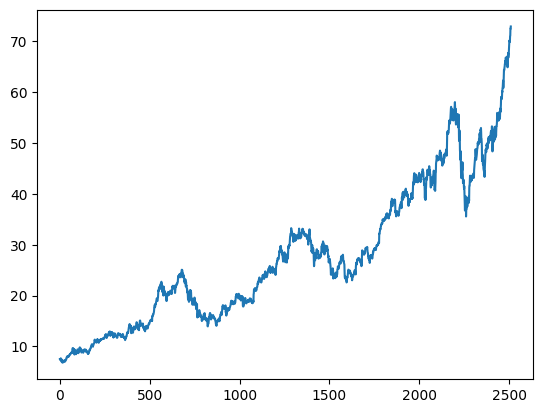

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.600000,7.607143,7.444643,7.503929,462229600
1,7.471071,7.491786,7.372143,7.418571,594459600
2,7.423929,7.533214,7.289286,7.523214,605892000
3,7.503929,7.516429,7.465000,7.479643,432894000
4,7.533214,7.557143,7.352500,7.354643,594067600
...,...,...,...,...,...
2505,70.132500,71.062500,70.092499,71.000000,98572000
2506,71.172501,71.222504,70.730003,71.067497,48478800
2507,71.205002,72.495003,71.175003,72.477501,93121200
2508,72.779999,73.492500,72.029999,72.449997,146266000


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2505    59.201075
2506    59.401700
2507    59.643125
2508    59.875125
2509    60.106325
Name: Close, Length: 2510, dtype: float64

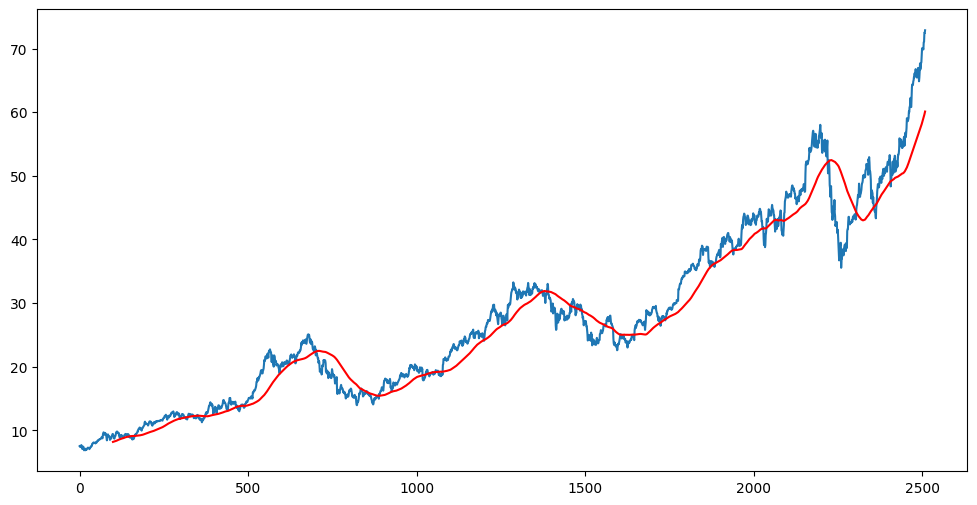

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2505    54.132313
2506    54.261513
2507    54.396763
2508    54.529350
2509    54.661100
Name: Close, Length: 2510, dtype: float64

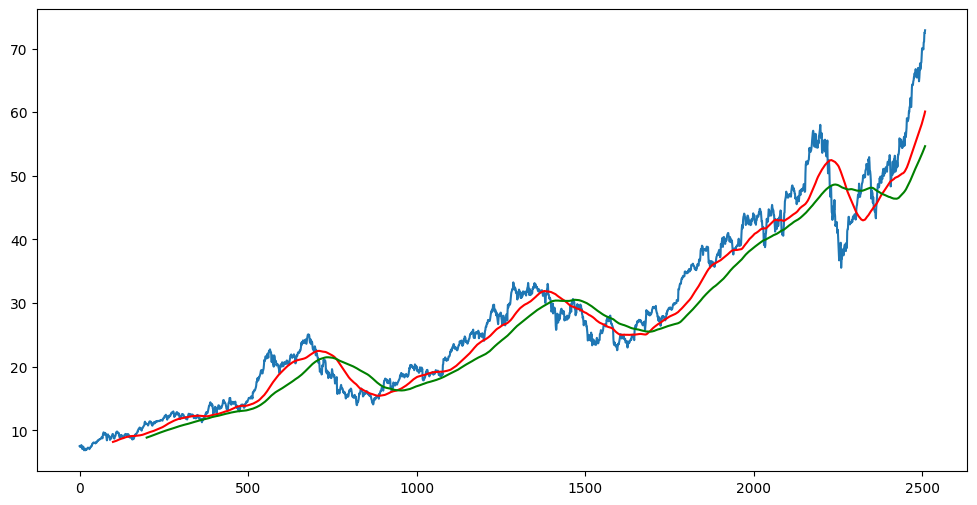

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape


(2510, 5)

In [12]:
# splitting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1757, 1)
(753, 1)


In [13]:
data_training.head()

,Close
0,7.503929
1,7.418571
2,7.523214
3,7.479643
4,7.354643


In [14]:
data_testing.head()

,Close
1757,29.037500
1758,29.004999
1759,29.152500
1760,29.477501
1761,29.747499


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02444008],
       [0.02120573],
       [0.02517081],
       ...,
       [0.84616011],
       [0.84587593],
       [0.83725556]])

In [17]:
data_training_array.shape

(1757, 1)

In [18]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape


(1657, 100, 1)

In [22]:
# ML Model

In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

# Adding the first LSTM layer with dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Adding the third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Adding the fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units = 1))


C:\Users\Yaseen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)



Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - loss: 0.1419
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0150
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0098
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0102
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0105
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0087
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0079
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0078
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0081
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0078
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0068
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0077
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0065
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0065
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - l

In [24]:
model.save('keras_model.h5')

In [25]:
past_100_days = data_training.tail(100)


In [26]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [27]:
final_df.head()

,Close
0,27.000000
1,26.982500
2,27.045000
3,27.370001
4,27.344999


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.07351774],
       [0.076968  ],
       [0.076

In [29]:
input_data.shape

(853, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(753, 100, 1)
(753,)


In [32]:
#Making Predictions

y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [33]:
y_predicted.shape

(753, 1)

In [34]:
y_test 

array([0.06911197, 0.06842189, 0.07155371, 0.07845431, 0.08418707,
       0.08482406, 0.08822126, 0.08556719, 0.08445249, 0.0895483 ,
       0.0894952 , 0.0883805 , 0.0895483 , 0.08997296, 0.08938906,
       0.09952758, 0.0998461 , 0.09989915, 0.09820055, 0.09671427,
       0.1359945 , 0.1348267 , 0.1377462 , 0.144169  , 0.15075112,
       0.15345824, 0.15547536, 0.1538829 , 0.16009341, 0.16927655,
       0.17187748, 0.17102824, 0.17299223, 0.17819418, 0.18037053,
       0.1772918 , 0.17798189, 0.17941503, 0.17973358, 0.1945963 ,
       0.19019062, 0.19454325, 0.19220766, 0.19316316, 0.19040291,
       0.18870427, 0.19114605, 0.19146452, 0.19034986, 0.19815283,
       0.19937368, 0.195658  , 0.20346096, 0.19486173, 0.20324859,
       0.20059453, 0.19910825, 0.20038224, 0.21588199, 0.21758055,
       0.21657199, 0.21513885, 0.21535114, 0.22103089, 0.21704978,
       0.21513885, 0.21344021, 0.21253783, 0.20436334, 0.20526571,
       0.20128461, 0.20542495, 0.2020808 , 0.19932054, 0.20866

In [35]:
y_predicted

array([[0.13371406],
       [0.1343522 ],
       [0.13483387],
       [0.13515736],
       [0.13534372],
       [0.13543585],
       [0.13548036],
       [0.13552408],
       [0.1355993 ],
       [0.13571984],
       [0.13589719],
       [0.13613804],
       [0.13643782],
       [0.13678707],
       [0.13717467],
       [0.13758606],
       [0.13802736],
       [0.13851155],
       [0.13904843],
       [0.13963757],
       [0.14026701],
       [0.14100677],
       [0.14195497],
       [0.14319155],
       [0.14477617],
       [0.14675622],
       [0.14913404],
       [0.1518528 ],
       [0.15485738],
       [0.15807734],
       [0.1615068 ],
       [0.16513164],
       [0.16891934],
       [0.17282507],
       [0.17674959],
       [0.18066242],
       [0.18452218],
       [0.18828696],
       [0.19191842],
       [0.19538382],
       [0.19867295],
       [0.20178375],
       [0.20472172],
       [0.2074923 ],
       [0.21010058],
       [0.2125443 ],
       [0.21481596],
       [0.216

In [36]:
scaler.scale_

array([0.02123255])

In [37]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

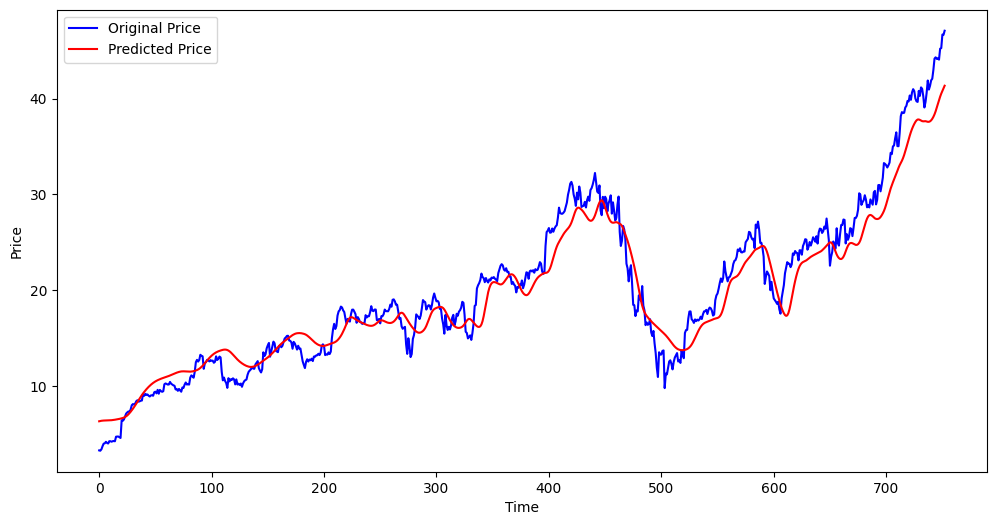

In [38]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()